In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='0'
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
#import warnings
#import csv
import gc
from time import time
import logging
#from scipy.io import loadmat
#from select_win import select_win,select_windows
import load_data as ldfile
#import create_model as cmodel
import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.device('/device:GPU:0')

#from scipy.signal import butter, sosfilt, sosfilt_zi, sosfiltfilt, lfilter, lfilter_zi, filtfilt, sosfreqz, resample
#from utils import hamilton_detector, christov_detector, findpeaks, engzee_detector
from ecg_detectors.ecgdetectors import Detectors, MWA, panPeakDetect, searchBack

np.random.seed(354)
#sns.set()
#warnings.filterwarnings('ignore')
#logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.random.set_seed(1342) # Set seed for reproducibility

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")


Default GPU Device:/device:GPU:0


In [2]:
t1 = time()
input_directory = '/dataset/PhysioNet2020/Training_WFDB' # Dataset on beastie 
train_data,train_labels_bin,val_data,val_labels_bin = ldfile.load_data2D_bin(input_directory) 
#train_dataset,val_dataset = ldfile.load_tf(train_data,train_labels_bin,val_data,val_labels_bin)
t2 = time()
print('Loading data in {} seconds.'.format(round(t2-t1)))


total number of files:  6877
Number of files for trainig:  5501
Number of files for validation:  687
Number of files for testing:  687
500 files were loaded for training!
1000 files were loaded for training!
1500 files were loaded for training!
2000 files were loaded for training!
2500 files were loaded for training!
3000 files were loaded for training!
3500 files were loaded for training!
4000 files were loaded for training!
4500 files were loaded for training!
5000 files were loaded for training!
5500 files were loaded for training!
499 files were loaded for validation!
Labels:
0. 164884008
1. 164889003
2. 164909002
3. 164931005
4. 270492004
5. 284470004
6. 426783006
7. 429622005
8. 59118001

number of test signals =  689

train_data type: <class 'list'>
train_labels  type: <class 'list'>
val_data  type: <class 'list'>
val_labels  type: <class 'list'>

train_data length 26828
train_labels length 26828
val_data length: 3532
val_labels length: 3532

train_data type: <class 'numpy.ndarr

In [3]:
train_data.shape

(26828, 12, 2500, 1)

In [4]:
def create_plot(data1, i, dir_path):
    
    #plt.figure()
    #figure(num=None, figsize=(100,10), dpi = 100)
    
    #fig,lead=plt.subplots(12,1, figsize=(20,60)) #### ORIGINAL - FOR ALL 12 LEADS
    fig,lead=plt.subplots(4,1, figsize=(10,20), dpi = 100)
    #plt.gca().set_axis_off()
    
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0) #deals with all the whitespace around the plots
    #plt.margins(0,0)

    lead[0].plot(data1[0],'black')
    lead[0].set_axis_off()
    #lead[1].plot(data1[1],'black')
    #lead[1].set_axis_off()
    #lead[2].plot(data1[2],'black')
    #lead[2].set_axis_off()
    #lead[3].plot(data1[3],'black')
    #lead[3].set_axis_off()
    lead[1].plot(data1[4],'black')
    lead[1].set_axis_off()
    #lead[5].plot(data1[5],'black')
    #lead[5].set_axis_off()
    lead[2].plot(data1[6],'black')
    lead[2].set_axis_off()
    #lead[7].plot(data1[7],'black')
    #lead[7].set_axis_off()
    #lead[8].plot(data1[8],'black')
    #lead[8].set_axis_off()
    #lead[9].plot(data1[9],'black')
    #lead[9].set_axis_off()
    #lead[10].plot(data1[10],'black')
    #lead[10].set_axis_off()
    lead[3].plot(data1[11],'black')
    lead[3].set_axis_off()
    
    file_name = 'img%d.png' %(i) 
    #fig.tight_layout()
    #plt.show()
    fig.savefig(os.path.join(dir_path,file_name), transparent = None, bbox_inches = 'tight', pad_inches = 0)
    plt.close()

STEPS:

1. Create an output folder (test to see if one exists)
2. Loop through 'train_data' -> plot images (do only 5000 at a time)

3. Save image into output folder
4. Take plotted image, open it and read it with imread (as an array item) 
5. append it to an array 'train_im'

6. Read through 'train_labels_bin' and copy section (5000 at a time) into 'train_lab'

7. Repeat process for 'val_data' and 'val_labels_bin'

8. Make train_dataset and val_dataset from data and labels combined.

### TRAINING DATA

In [11]:
# test block to test the function in step 1:
dir_path = "temp_outputs"
os.makedirs(dir_path, exist_ok=True)

In [12]:
# test block to test the loop in step 2 & 3:
t1 = time()
for i,j in zip (range(0,6000), range(10000,16000)):  #the second range is for the file numbers you're gonna generate in the 
    test_1 = create_plot(train_data[i], j, dir_path)
    
t2 = time()
print('Loading data in {} seconds.'.format(round(t2-t1)))

Loading data in 962 seconds.


In [28]:
# test blcok to test saving the img in step 4 & 5:


t1 = time()
X_data = []
files = sorted(glob.glob('temp_outputs/*.png')) #change temp_outputs to your temporary storage area for images created
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)
train_im = np.asarray(X_data)

t2 = time()
print('Loading data in {} seconds.'.format(round(t2-t1)))

temp_outputs/img10000.png
temp_outputs/img10001.png
temp_outputs/img10002.png
temp_outputs/img10003.png
temp_outputs/img10004.png
temp_outputs/img10005.png
temp_outputs/img10006.png
temp_outputs/img10007.png
temp_outputs/img10008.png
temp_outputs/img10009.png
Loading data in 0 seconds.


In [29]:
type(train_im)
train_im.shape

(10, 2000, 1000, 3)

In [9]:
train_labels_bin.shape

(26828, 9)

In [5]:
# test block for step 6:

start = 0
end = 6000

rows, cols = (6000, 9) 
temp_arr = [[0]*cols]*rows 

for i, j in zip (range(0,6000), range(start, end)):    
    temp_arr[i][:] = train_labels_bin[j][:];    
    print(i, j)

train_lab = np.asarray(temp_arr)
train_lab = train_lab.astype('uint8') 

np.save('train_lab_set_1.npy', train_lab)
del train_lab
gc.collect()

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
151 151
152 

0

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
def train_batch (train_data, start, end):
    
    # test block to test the function in step 1:
    dir_path = "train_outputs_s1"
    os.makedirs(dir_path, exist_ok=True)

    diff = end-start
    range_end = 1000+diff
    # test block to test the loop in step 2 & 3:
    for i,j in zip (range(start, end), range(10000,range_end)):  #the second range is for the file numbers you're gonna generate in the 
        test_1 = create_plot(train_data[i], j, dir_path)
    

    # test blcok to test saving the img in step 4 & 5:
    X_data = []
    files = sorted(glob.glob('train_outputs_s1/*.png')) #change temp_outputs to your temporary storage area for images created
    for myFile in files:
        image = cv2.imread (myFile)
        X_data.append (image)
    #train_im = np.asarray(X_data)
    
    #return train_im
    return X_data

In [8]:
# Tracking for Training Data:

#Train_data size: 26828
#single 'train_batch': 500
#number of batches to load: 53.656

t1 = time()

#train_d1 = [[]]
for i in range(0,6):
    length = 1000 # pick how big do you want your length to be
    start = i*length
    end = start+length
    print('round:', i, 'start:', start, 'end:', end)
    t_d = train_batch(train_data, start, end)
    print('converting into array for round:', i)
    if i==0:
        train_d = np.asarray(t_d)
        #print('starting to work')
    else:
        train_d1 = np.asarray(t_d)
        #print('is it working?')
        train_d = np.append(train_d, train_d1 , axis=0) 
    
    del t_d
    gc.collect()

print(train_d.shape)
    
np.save('train_set_1.npy', train_d)
del train_d, train_d1
gc.collect()
    
t2 = time()
print('Loading data in {} seconds.'.format(round(t2-t1)))   

round: 0 start: 0 end: 1000
converting into array for round: 0
starting to work
round: 1 start: 1000 end: 2000
converting into array for round: 1
is it working?
round: 2 start: 2000 end: 3000
converting into array for round: 2
is it working?
round: 3 start: 3000 end: 4000
converting into array for round: 3
is it working?
round: 4 start: 4000 end: 5000
converting into array for round: 4
is it working?
round: 5 start: 5000 end: 6000
converting into array for round: 5
is it working?
(0,)
Loading data in 1 seconds.


In [ ]:
train_d.shape
#train_lab.shape

In [9]:
# DO NOT DO THIS UNTIL ALL 26828  are loaded in train_set_#.npy files
del train_data
gc.collect()

22

### VALIDATION DATA

In [11]:
# test block to test the function in step 1:
dir_path = "temp_val_outputs"
os.makedirs(dir_path, exist_ok=True)

In [12]:
# test block to test the loop in step 2 & 3:
t1 = time()
for i,j in zip (range(0,500), range(1000,1500)):
    test_1 = create_plot(val_data[i], j, dir_path)
    
t2 = time()
print('Loading data in {} seconds.'.format(round(t2-t1)))

Loading data in 111 seconds.


In [7]:
# test blcok to test saving the img in step 4 & 5:

t1 = time()
X_data = []
files = sorted(glob.glob('temp_val_outputs/*.png')) #change temp_outputs to your temporary storage area for images created
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)
val_im = np.asarray(X_data)

t2 = time()
print('Loading data in {} seconds.'.format(round(t2-t1)))

temp_outputs/img0.png
temp_outputs/img1.png
temp_outputs/img10.png
temp_outputs/img11.png
temp_outputs/img12.png
temp_outputs/img13.png
temp_outputs/img14.png
temp_outputs/img15.png
temp_outputs/img16.png
temp_outputs/img17.png
temp_outputs/img18.png
temp_outputs/img19.png
temp_outputs/img2.png
temp_outputs/img20.png
temp_outputs/img21.png
temp_outputs/img22.png
temp_outputs/img23.png
temp_outputs/img24.png
temp_outputs/img25.png
temp_outputs/img26.png
temp_outputs/img27.png
temp_outputs/img28.png
temp_outputs/img29.png
temp_outputs/img3.png
temp_outputs/img30.png
temp_outputs/img31.png
temp_outputs/img32.png
temp_outputs/img33.png
temp_outputs/img34.png
temp_outputs/img35.png
temp_outputs/img36.png
temp_outputs/img37.png
temp_outputs/img38.png
temp_outputs/img39.png
temp_outputs/img4.png
temp_outputs/img40.png
temp_outputs/img41.png
temp_outputs/img42.png
temp_outputs/img43.png
temp_outputs/img44.png
temp_outputs/img45.png
temp_outputs/img46.png
temp_outputs/img47.png
temp_outputs/img

In [13]:
type(val_im)
val_im.shape

(100, 6000, 2000, 3)

In [14]:
train_labels_bin.shape

(26828, 9)

In [11]:
# test block for step 6:

start = 0
end = 3000

rows, cols = (3000, 9) 
temp_arr = [[0]*cols]*rows 

for i, j in zip (range(0,3000), range(start, end)):    
    temp_arr[i][:] = val_labels_bin[j][:];    
    print(i, j)

val_lab = np.asarray(temp_arr)
val_lab = val_lab.astype('uint8') 

np.save('val_lab.npy', val_lab)
del val_lab
gc.collect()

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
151 151
152 

8

In [15]:
val_lab.dtype

dtype('uint8')

In [8]:
def val_batch (val_data, start, end):
    

    # test block to test the function in step 1:
    dir_path = "temp_val_outputs"
    os.makedirs(dir_path, exist_ok=True)

    # test block to test the loop in step 2 & 3:
    diff = end-start
    range_end = 1000+diff
    for i,j in zip (range(0,1000), range(10000,range_end)): #the second range is for the file numbers you're gonna generate in the 
        test_1 = create_plot(val_data[i], j, dir_path)

    # test blcok to test saving the img in step 4 & 5:
    X_data = []
    files = sorted(glob.glob('temp_val_outputs/*.png')) #change temp_outputs to your temporary storage area for images created
    for myFile in files:
        
        image = cv2.imread (myFile)
        X_data.append (image)
    #val_im = np.asarray(X_data)

    
    #return val_im
    return X_data

In [9]:
# Tracking for Validation Data:

#Train_data size: 3532
#single 'train_batch': 500
#number of batches to load: ~6

t1 = time()

#train_d1 = [[]]
for i in range(0,3):
    length = 1000 # pick how big do you want your length to be
    start = i*length
    end = start+length
    print('round:', i, 'start:', start, 'end:', end)
    v_d = val_batch(val_data, start, end)
    print('converting into array for round:', i)
    if i==0:
        val_d = np.asarray(v_d)
    else:
        val_d1 = np.asarray(v_d)
        val_d = np.append(val_d, val_d1 , axis=0) 
    
    del v_d
    gc.collect()
    
np.save('val_set_1.npy', val_d)
del val_d, val_d1
gc.collect()
    
t2 = time()
print('Loading data in {} seconds.'.format(round(t2-t1)))   

round: 0 start: 0 end: 100
converting into array for round: 0
round: 1 start: 100 end: 200
converting into array for round: 1
Loading data in 150 seconds.


In [15]:
del val_data
gc.collect()

22

In [ ]:
val_d.shape
val_lab.shape

### Dataset Creation

In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12262508418987916321
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17785432303931898954
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17735744722547373383
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2452777615047944231
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:2"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16260589176604355123
physical_device_desc: "device: XLA_GPU device"
]


In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
#import warnings
#import csv
import gc
from time import time
import logging
#from scipy.io import loadmat
#from select_win import select_win,select_windows
import load_data as ldfile
#import create_model as cmodel
import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#from scipy.signal import butter, sosfilt, sosfilt_zi, sosfiltfilt, lfilter, lfilter_zi, filtfilt, sosfreqz, resample
#from utils import hamilton_detector, christov_detector, findpeaks, engzee_detector
from ecg_detectors.ecgdetectors import Detectors, MWA, panPeakDetect, searchBack

np.random.seed(354)
#sns.set()
#warnings.filterwarnings('ignore')
#logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.random.set_seed(1342) # Set seed for reproducibility


In [4]:
# generate the datasets for step 8:
train_d = np.load('train_d_1.npy')
val_d = np.load('val_d_1.npy')
train_lab = np.load('train_lab.npy')
val_lab = np.load('val_lab.npy')

train_set_conv,valid_set_conv = ldfile.load_tf(train_d,train_lab,val_d,val_lab)


print ("train_im, train_lab types: ", type(train_d), type(train_lab))
#### check the shape of the data
print ("shape of images and labels array: ", train_d.shape, train_lab.shape) 
print ("shape of images and labels array ; test: ", val_d.shape, val_lab.shape)


train_dataset type:  <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
val_dataset type:  <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
train_im, train_lab types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
shape of images and labels array:  (400, 6000, 2000, 3) (400, 9)
shape of images and labels array ; test:  (200, 6000, 2000, 3) (200, 9)


In [5]:
del train_d, val_d, train_lab, val_lab
gc.collect()

22

In [6]:
train_d = [400, 6000,2000,3]
val_d = [200, 6000, 2000,3]
train_lab = [400, 9]
val_lab = [200, 9]

# RESNET 50

In [7]:
#### Necessary Imports for Neural Net 

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add 
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [8]:
def res_identity(x, filters): 
    ''' renet block where dimension doesnot change.
    The skip connection is just simple identity conncection
    we will have 3 blocks and then input will be added
    '''
    x_skip = x # this will be used for addition with the residual block 
    f1, f2 = filters

    #first block 
    x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    #second block # bottleneck (but size kept same with padding)
    x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # third block activation used after adding the input
    x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    # x = Activation(activations.relu)(x)

    # add the input 
    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)

    return x

In [9]:
def res_conv(x, s, filters):
    '''
    here the input size changes, when it goes via conv blocks
    so the skip connection uses a projection (conv layer) matrix
    ''' 
    x_skip = x
    f1, f2 = filters

    # first block
    x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x)
    # when s = 2 then it is like downsizing the feature map
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # second block
    x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    #third block
    x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)

    # shortcut 
    x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
    x_skip = BatchNormalization()(x_skip)

    # add 
    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)

    return x

In [15]:
### Combine the above functions to build 50 layers resnet. 
def resnet50():
    
    #input_im = Input(shape=(train_d.shape[1], train_d.shape[2], train_d.shape[3])) # cifar 10 images size
    input_im = Input(shape=(train_d[1], train_d[2], train_d[3])) # train_d
    x = ZeroPadding2D(padding=(3, 3))(input_im)

    # 1st stage
    # here we perform maxpooling, see the figure above

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    #2nd stage 
    # frm here on only conv block and identity block, no pooling

    x = res_conv(x, s=1, filters=(64, 256))
    x = res_identity(x, filters=(64, 256))
    x = res_identity(x, filters=(64, 256))

    # 3rd stage

    x = res_conv(x, s=2, filters=(128, 512))
    x = res_identity(x, filters=(128, 512))
    x = res_identity(x, filters=(128, 512))
    x = res_identity(x, filters=(128, 512))

    # 4th stage

    x = res_conv(x, s=2, filters=(256, 1024))
    x = res_identity(x, filters=(256, 1024))
    x = res_identity(x, filters=(256, 1024))
    x = res_identity(x, filters=(256, 1024))
    x = res_identity(x, filters=(256, 1024))
    x = res_identity(x, filters=(256, 1024))

    # 5th stage

    x = res_conv(x, s=2, filters=(512, 2048))
    x = res_identity(x, filters=(512, 2048))
    x = res_identity(x, filters=(512, 2048))

    # ends with average pooling and dense connection

    x = AveragePooling2D((2, 2), padding='same')(x)

    x = Flatten()(x)
    #x = Dense(len(class_types), activation='softmax', kernel_initializer='he_normal')(x) #multi-class
    x = Dense(9, activation='softmax', kernel_initializer='he_normal', name ='visualized_layer')(x) #multi-class
    # define the model 

    with tf.device("/GPU:2"):
        model = Model(inputs=input_im, outputs=x, name='Resnet50')

    return model

In [16]:
### Define some Callbacks
def lrdecay(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    #print('Learning rate: ', lr)
    return lr
  # if epoch < 40:
  #   return 0.01
  # else:
  #   return 0.01 * np.math.exp(0.03 * (40 - epoch))
lrdecay = tf.keras.callbacks.LearningRateScheduler(lrdecay) # learning rate decay  


def earlystop(mode):
    if mode=='acc':
        estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max')
    elif mode=='loss':
        estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min')
    return estop    

In [17]:
resnet50_model = resnet50()

In [19]:
resnet50_model.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6000, 2000,  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 6006, 2006, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 3000, 1000, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 3000, 1000, 6 256         conv2d_53[0][0]                  
___________________________________________________________________________________________

In [20]:
with tf.device("/GPU:0"):
    resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), 
                       metrics=['acc'])

In [21]:
batch_size=1 # test with 64, 128, 256
with tf.device("/GPU:0"):
    resnet_train = resnet50_model.fit(train_set_conv, 
                                  epochs=10, 
                                  verbose = 2,
                                  #steps_per_epoch=train_im.shape[0]/batch_size,
                                  #steps_per_epoch=train_d.shape[0]/batch_size,
                                  steps_per_epoch=train_d[0]/batch_size, #for train_d
                                  #validation_steps=valid_im.shape[0]/batch_size, 
                                  #validation_steps=val_d.shape[0]/batch_size, 
                                  validation_steps=val_d[0]/batch_size,
                                  validation_data=valid_set_conv, 
                                  callbacks=[lrdecay])

Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[64,6000,2000,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node Resnet50/Cast (defined at <ipython-input-21-0078be39c3b7>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_21473]

Function call stack:
train_function


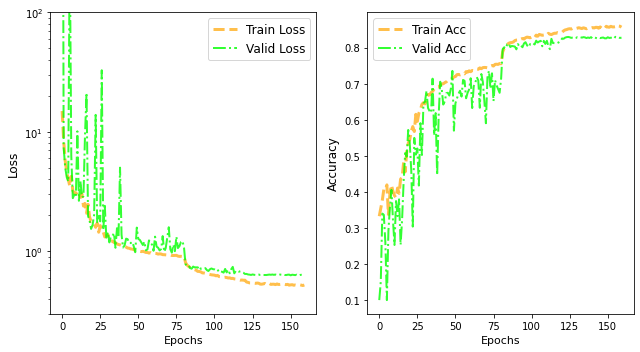

In [ ]:
### Plot train and validation curves
loss = resnet_train.history['loss']
v_loss = resnet_train.history['val_loss']

acc = resnet_train.history['acc']
v_acc = resnet_train.history['val_acc']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/resnet/train_acc.png', dpi=250)
plt.show()

In [ ]:
image = PIL.Image.open("sample.png")